**Описание полей**


* fluor - флуорисценция (свойство камня светиться в ультрафиолетовых лучах)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from IPython.core.pylabtools import figsize
%config InlineBackend.figure_format="retina"
from category_encoders import TargetEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, accuracy_score, recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder,OrdinalEncoder
plt.rcParams['font.size'] = 24

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

sns.set(font_scale = 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df.columns

Index(['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'id', 'date', 'price', 'carat', 'price_per_carat', 'z', 'x',
       'depth_perc', 'y'],
      dtype='object')

In [ ]:
columns=['fluor', 'symmetry', 'platform', 'shape', 'color', 'clarity', 'cut',
       'polish', 'id', 'date', 'price', 'carat', 'price_per_carat', 'z', 'x',
       'depth_perc', 'y']

In [ ]:
df = pd.read_csv(path + '/Classroom/diamonds.csv',sep=',',index_col=0,header=0,names=columns)

Необходимо предсказать `price_per_carat`

In [ ]:

df.head

<bound method NDFrame.head of        fluor symmetry    platform shape color clarity  cut polish        id  \
135269  NONE       EX  jamesallen    PS     F     SI1  NaN     EX  13870838   
48477    MED       EX  jamesallen    RD     H    VVS2   EX     EX  11725253   
236786  NONE       EX  jamesallen    EM     H      IF  NaN     EX  14444347   
235781  NONE       EX  jamesallen    RD     E     VS2   EX     EX  14438434   
277744  NONE       VG  jamesallen    RD     F     VS1   VG     EX  14615276   
...      ...      ...         ...   ...   ...     ...  ...    ...       ...   
20595   NONE       EX  jamesallen    RD     D     VS2   EX     EX   7535786   
282754  NONE       EX  jamesallen    RD     D     VS2   EX     EX  14631732   
141550  NONE       EX  jamesallen    RD     J     SI2   EX     EX  13932645   
71237    STG       EX  jamesallen    RD     G     VS1   EX     EX  12699310   
310690  NONE       EX  jamesallen    RD     I    VVS2   EX     EX  14734535   

          date    pri

In [ ]:
# Посмотрим на наш датасет.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222222 entries, 135269 to 310690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            222207 non-null  object 
 1   symmetry         222218 non-null  object 
 2   platform         222218 non-null  object 
 3   shape            222218 non-null  object 
 4   color            222218 non-null  object 
 5   clarity          222218 non-null  object 
 6   cut              148981 non-null  object 
 7   polish           222218 non-null  object 
 8   id               222222 non-null  int64  
 9   date             222222 non-null  int64  
 10  price            222222 non-null  float64
 11  carat            222222 non-null  float64
 12  price_per_carat  222222 non-null  float64
 13  z                222222 non-null  float64
 14  x                222222 non-null  float64
 15  depth_perc       222222 non-null  float64
 16  y                222222 non-null 

ОБратим внимание на столбец platform. Так как он инвариантен и обозначает имя торговой площадки, то удалим его.

In [ ]:
df= df.drop(columns=['platform'])


In [ ]:
#Количество уникальных элементов
df.nunique()
# ID 162278 штук на 222222 строки.

fluor                   4
symmetry                4
shape                  10
color                  10
clarity                 9
cut                     3
polish                  3
id                 162278
date                    4
price                8437
carat                 632
price_per_carat     52605
z                    1116
x                     904
depth_perc            318
y                   37650
dtype: int64

### Задание 1: Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

**Попробуйте найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
#Ищем полные дубликаты(Количество строк у которых есть дубликаты)
duplicateRows = df[df.duplicated ()]
len(duplicateRows)
# 2544. Количество уникальных

2544

In [ ]:
df.isna().sum()

fluor                 15
symmetry               4
shape                  4
color                  4
clarity                4
cut                73241
polish                 4
id                     0
date                   0
price                  0
carat                  0
price_per_carat        0
z                      0
x                      0
depth_perc             0
y                      0
dtype: int64

У нас есть по 4 NaN в столбцах 'symmetry','platform','polish','shape','color','clarity'. Убедимся в том, что это не какие-то уникальные камни(все-же речь о брильянтах :)).Однако, уже по первой харрактеристике видно, что это четыре записи с нулевой информацией и являющиеся полными дубликатами. Удалим их.

In [ ]:
#Смотрим на 4 строки где symmetry nan
res = df.loc[df['symmetry'].isna()]
res.head

<bound method NDFrame.head of        fluor symmetry shape color clarity  cut polish  id  date  price  carat  \
202754   NaN      NaN   NaN   NaN     NaN  NaN    NaN   0     0    0.0    0.0   
244620   NaN      NaN   NaN   NaN     NaN  NaN    NaN   0     0    0.0    0.0   
53946    NaN      NaN   NaN   NaN     NaN  NaN    NaN   0     0    0.0    0.0   
53948    NaN      NaN   NaN   NaN     NaN  NaN    NaN   0     0    0.0    0.0   

        price_per_carat    z    x  depth_perc    y  
202754              0.0  0.0  0.0         0.0  0.0  
244620              0.0  0.0  0.0         0.0  0.0  
53946               0.0  0.0  0.0         0.0  0.0  
53948               0.0  0.0  0.0         0.0  0.0  >

In [ ]:
df=df.drop(index = [202754,244620,53946,53948])

In [ ]:
len(df)

222218

Переведем date в формат даты.

In [ ]:
#from pandas.core.tools.datetimes import to_datetime
#df['date']=to_datetime(df['date'],format='%Y%m')

In [ ]:
#Удалим полные дубликаты.
df=df.drop_duplicates()
len(df)

219678

In [ ]:
#Посмотрим, что осталось
df.isna().sum()

fluor                 12
symmetry               1
shape                  1
color                  1
clarity                1
cut                72084
polish                 1
id                     0
date                   0
price                  0
carat                  0
price_per_carat        0
z                      0
x                      0
depth_perc             0
y                      0
dtype: int64

Так как fluor Nan всего 11 значений, что составляет 0,005% выборки (219677), то удалим их.

In [ ]:
df = df[~df['fluor'].isna()]


In [ ]:
# Категориальные признаки малочисленны
df.select_dtypes(object).nunique()

fluor        4
symmetry     4
shape       10
color       10
clarity      9
cut          3
polish       3
dtype: int64

Так как cut(огранка) категориальный признак и относится не ко всем камным(только круглым), то NaN заменим на новую категорию No

In [ ]:
# Копия для удаления Nan в
df_no_nan_cut=df.copy()
df_no_nan_cut=df_no_nan_cut.dropna(subset=['cut'])

In [ ]:
df_no_nan_cut.isna().sum()

fluor              0
symmetry           0
shape              0
color              0
clarity            0
cut                0
polish             0
id                 0
date               0
price              0
carat              0
price_per_carat    0
z                  0
x                  0
depth_perc         0
y                  0
dtype: int64

In [ ]:
df.cut=df.cut.fillna('No')

In [ ]:
df.shape

(219666, 16)

Посмотрим есть ли строчки с некорректными значениями размеров (х,y,z меньше либо равными нуля).
Таких данных нет.

In [ ]:
df[(df.x<=0) | (df.y<=0) | (df.z<=0)]

,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y


Посмотрим корреляцию размеров.

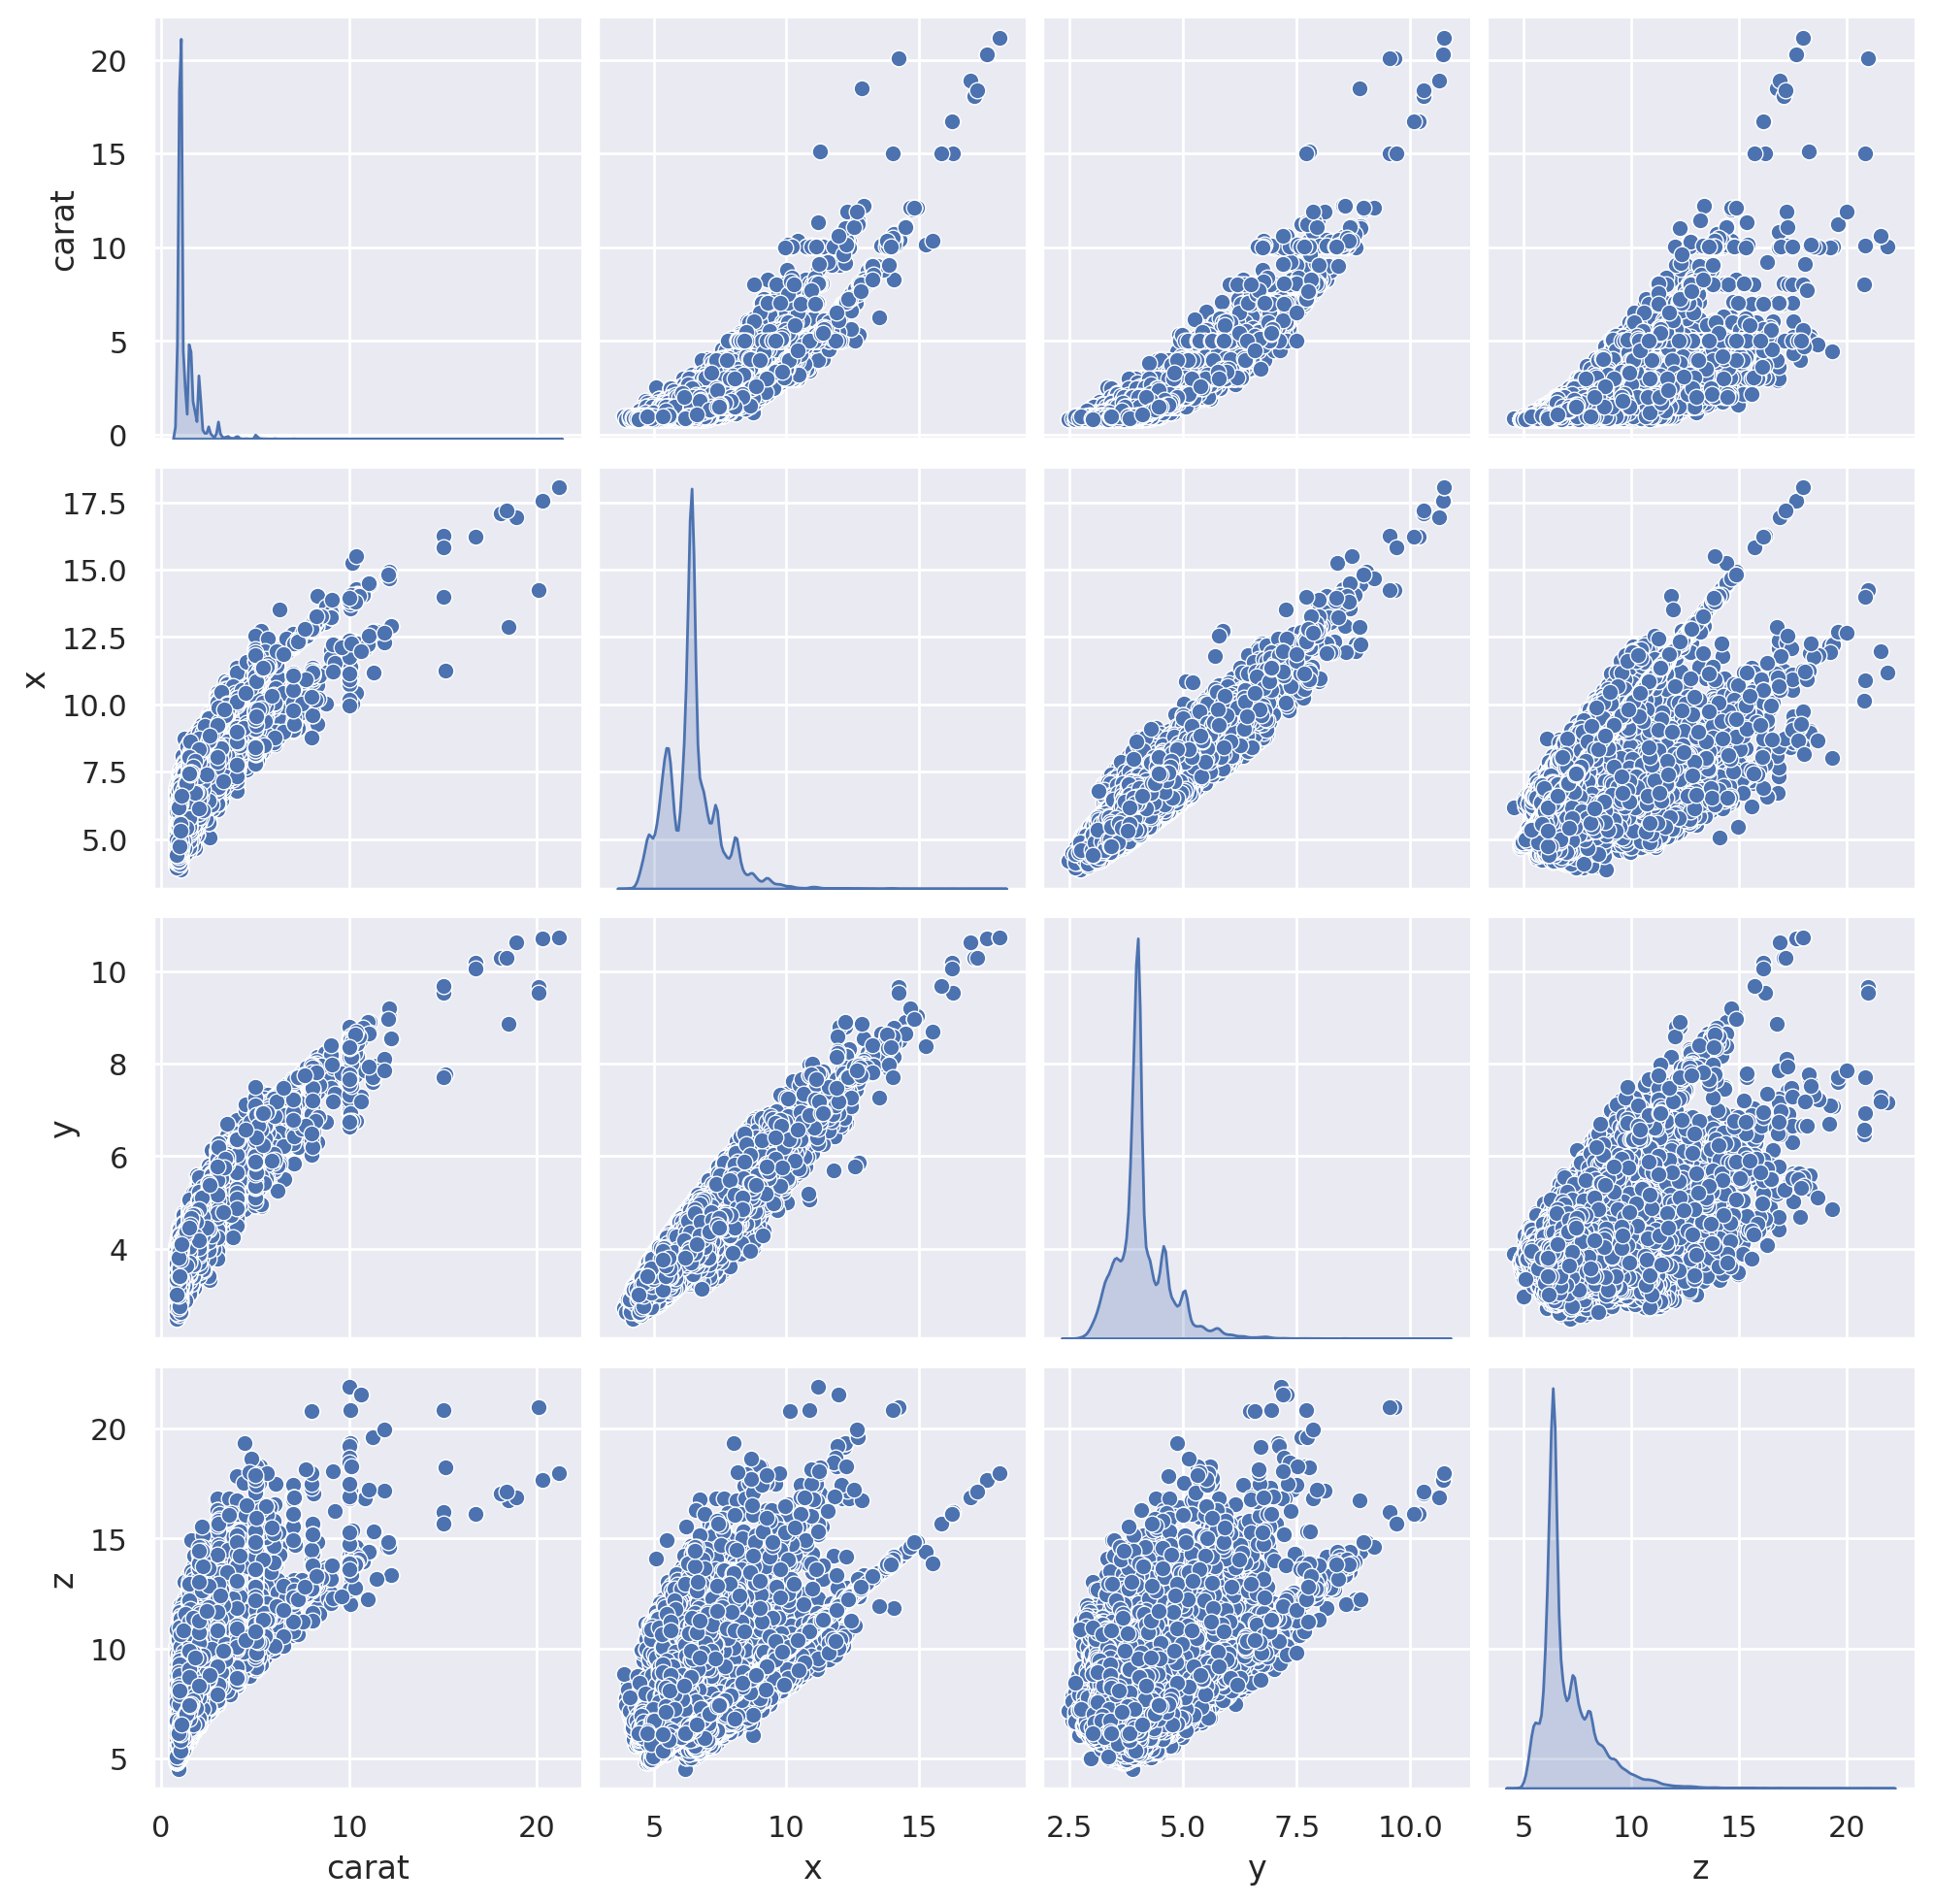

In [ ]:
df_s=df[['carat','x','y','z']]
sns.pairplot(df_s, diag_kind = 'kde')

Depth_perc В данном Датасете это отношениве ВЫСОТЫ(Y) к ШИРИНЕ (Х). Поэтому depth_perc линейная функция и прямокоррелирует с Х и Y. Также,сильно линейно коррелируют сами размеры камней X Y Z(Диаметр).



Таким образом, так как плотность бриллианта практичски табличная величина, а масса (1 карат=0,2гр) в нашем датасете уникальных обьектов-камней = обьем * плотность, то опустим столбцы X,Y и Z оставив один столбец carat, как харрактериcтику.

In [ ]:
df= df.drop(columns=['x','y','z'])

Посмотрим на категории огранки. Всего четыре типа. Было бы правильно закодировать их Ordinal Encoding.
Но, так как Ordinal Encoding кодирует элементы в порядке их появления(или алфавитном) а мы знаем логику обозначений,(EX VG G No) то сделаем это вручную.
Так как харрактеристики одинаковы, также заполним symmetry и polish(правда без категории No)

In [ ]:
Gem_cut_sym_encoding = {
    "No": 1,
    "G": 2,
    "VG": 3,
    "EX": 4,
}
Gem_pol_encoding = {
    "G": 1,
    "VG": 2,
    "EX": 3,
}
df_x=pd.DataFrame(df.groupby(df['cut'].tolist(),as_index= False ).size())
df_x.sort_values(['index'])
df['cut']=df['cut'].map(Gem_cut_sym_encoding)
df['symmetry']=df['symmetry'].map(Gem_cut_sym_encoding)
df['polish']=df['polish'].map(Gem_pol_encoding)
#df['cut'].apply(lambda x:
#    Gem_cut_encoding.get(x, np.nan)





Проверим

In [ ]:
df_x=pd.DataFrame(df.groupby(df['polish'].tolist(),as_index= False ).size())
df_x.sort_values(['index'])

,index,size
0,1,1662
1,2,27399
2,3,190605


Аналогично поступим с clarity (пороки камня) согласно мировой классификации.

In [ ]:
Gem_clarity = {
    "FL": 9,
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2": 4,
    "SI1": 3,
    "SI2": 2,
    "I1": 1,
}
df['clarity']=df['clarity'].map(Gem_clarity)


In [ ]:
df_x=pd.DataFrame(df.groupby(df['clarity'].tolist(),as_index= False ).size())
df_x.sort_values(['index'])

,index,size
0,1,7618
1,2,47805
2,3,44150
3,4,39677
4,5,36292
5,6,22483
6,7,15730
7,8,5544
8,9,367


И со цветом.

In [ ]:
def enc_color(df):
  tmp=[['M','L','K','J','I','H','G','F','E','D']]
  df['color'] = df['color'].astype('category')
  df['color'] = df['color'].cat.codes
  encoder = OrdinalEncoder()
  #class_array=np.array(df['color']).reshape(-1,1)
  df['color'] = encoder.fit_transform(df[['color']])
  return df

In [ ]:
df=enc_color(df)

In [ ]:
df_x=pd.DataFrame(df.groupby(df['color'].tolist(),as_index= False ).size())
df_x.sort_values(['index'])

In [ ]:
#df_three =df.query('id=  lambda x:df.groupby(['id'])['color'].count()   df.columns.str.contains('run',case=False)].head()


In [ ]:
len(df)

219666

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame().rename({'carat':'Quantity'},axis=1) #Посчитайте статистику по кол-ву камней
id_stat
# разделите выборку на две части
df_one_1 = id_stat[id_stat['Quantity']==1].index # те камни, которые встречались один раз
df_one=df[df['id'].isin(df_one_1)]
df_three_1 = id_stat[id_stat['Quantity'].isin ([2,3])].index # те камни, которые встречались 2 или 3 раза
df_three=df[df['id'].isin(df_three_1)]


Посчитаем стандартное отклонение, то есть на сколько каждое значение отличается от среднего.
Так как у нас массив камней, то если предположить что один и тот же камень(под одним ID) продавец выставлял на продажу 2-3 раза, сам камень не менялся и std массы равно нулю.(как и std XYZ и как следствие depth_perc).
Однако в некоторых случаях харрактеристики камня пол одним id изменились. Так как мы не можем выбрать верный вариант описания реального материального обьекта(имеют место быть не нулевые средние квадратичные depth_perc, что знакит ошибки измерения размеров камня при повторных добавлениях выбоку), то опустим такие случаи тем более их ~13% что целом укладывается в допустимые 10-15% выборки.

Заменять физические камни математическим обьектом не целесообразно, так как выборка теряет достоверность.

Соотвественно цена за карат должна отклонятся в разумных пределах и классически уберем выбросы по 3 ст.отклонений.

In [ ]:
stat = df_three.groupby('id')['price','carat','price_per_carat','depth_perc'].agg(np.std) # Посчитайте дстандартное отклонение.где оно должно равняться 0
stat

<ipython-input-261-9b6c1caf386b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stat = df_three.groupby('id')['price','carat','price_per_carat','depth_perc'].agg(np.std) # Посчитайте дстандартное отклонение.где оно должно равняться 0


,price,carat,price_per_carat,depth_perc
id,,,,
19423,334.863156,0.0,318.916742,0.404145
19449,494.974747,0.0,423.054916,0.000000
19501,831.384388,0.0,415.692194,0.346410
19504,0.000000,0.0,0.000000,0.212132
19505,813.172798,0.0,404.564074,0.353553
...,...,...,...,...
15159825,601.040764,0.0,601.040764,0.000000
15159829,466.690476,0.0,457.540514,0.000000
15159840,657.609307,0.0,730.681721,0.000000


In [ ]:
for i in ['price', 'carat', 'price_per_carat', 'depth_perc']:
   print(f'!=0 {i}: {stat[stat[i] > 0].shape[0]}')

!=0 price: 43043
!=0 carat: 11
!=0 price_per_carat: 43047
!=0 depth_perc: 30584


In [ ]:
drop=stat[(stat['carat']>0)|(stat['depth_perc']>0)]
df_three=df_three[~df['id'].isin(drop.index)]
def iqr(df,col,c):
  '''
  Функция удаляет выбросы по iqr * c
  '''
  qur_1 = df[col].describe()['25%']
  qur_3 = df[col].describe()['75%']
  iqr = qur_3 - qur_1
  condition = (df[col]>(qur_1 - c * iqr)) & (df[col] < (qur_3 + c * iqr))
  df=df[condition]
  return df
#p_col= 'price_per_carat'
df_three=iqr(df_three,'price_per_carat',3)

<ipython-input-263-61a2da4cd5d7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_three=df_three[~df['id'].isin(drop.index)]


In [ ]:
len(df_three)

37618

Удалим дубли в камнях взяв камень по последней дате.

In [ ]:
idx=df_three.groupby('id')['price'].idxmax()
df_three=df_three.loc[idx]

In [ ]:
len(df_three)

18482

In [ ]:
df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты
df=iqr(df,'price',3)
df=iqr(df,'price_per_carat',3)

In [ ]:
df_no_nan_cut.isna().sum()

fluor              0
symmetry           0
shape              0
color              0
clarity            0
cut                0
polish             0
id                 0
date               0
price              0
carat              0
price_per_carat    0
z                  0
x                  0
depth_perc         0
y                  0
dtype: int64

In [ ]:
len(df)

125599

Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.*

In [ ]:
def df_inf(df):
  categories = ['carat'] #определите по каким группам отпределять инфляцию (к примеру можно добавить каратную группу)

  df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
               .mean()\
               .reset_index() # индекс цен

  date_max = df_index.date.max()


  df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}),
                          on=categories, how='outer') # сопоставляем группы с максимальной датой
  df_index
  df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat # вычисляем инфляцию

  df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']],
                        on=['date'] + categories, how='left') # соединяем все в одной таблице

  df_with_inf = df_with_inf.dropna(subset=['inflation']).sort_values(by='inflation')
  return df_with_inf

In [ ]:
df_inf(df)

### Задание 2: Модель

Определите функцию потерь (MSE или MAE) и аргументируйте выбор.
Попробуйте сделать baseline.
Используйте LableEncoder для категориальных фичей и **постройте линейную модель**.

Диапазон цен довольно большой, с некоторыми очень дорогими алмазами. Поэтому MSE может быть более подходящим выбором функции потерь(так как она сильнее реагирует на большие большим ошибкам и более чувствителен к выбросам)
MAE равномерно взвешивает все ошибки и более устойчив к выбросам, поэтому рассмотрим обе модели
MAE (Mean Absolute Error) - средняя абсолютная ошибка:
1\2 Сумм по i lj n Y действительное - Y предсказанное по модулю.
MSE - средняя квадратичная ошибка: Сумма квадратов.

В данном случае baseline будет линейная модель.

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
def mse(y_true, y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()




In [ ]:
df_label=df.copy()
df_OHE=df.copy()
df_TE=df.copy()


Так как после углубенного EDA у нас остались только 2 колонки категориальных признаков то создадим 3 датасета с разными кодировками этих столбцов

In [ ]:
le = LabelEncoder()
# Применяем LabelEncoder к столбцам fuor и shape в датафрейме df
df_label['fluor'] = le.fit_transform(df_label['fluor'])
df_label['shape'] = le.fit_transform(df_label['shape'])
le = LabelEncoder()
# Применяем OHE
df_OHE=pd.get_dummies(df_OHE,columns=['fluor','shape'])
# Применим Target_Encoder
te = TargetEncoder(cols=['fluor','shape'])
te.fit(df_TE[['fluor','shape']],df_TE['price_per_carat'])
df_r= te.transform(df_TE[['fluor', 'shape']])
df_TE = pd.concat([df_TE.drop(['fluor', 'shape'], axis=1), df_r], axis=1)





In [ ]:
def L_reg(df):
  '''
  Инфляция + нормализация + Линейная регрессия
  '''
  df=df_inf(df)
  X = df.drop(columns=["price_per_carat"],axis=1)
  y = df["price_per_carat"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
  scaler = StandardScaler() # Помните, что на тесте делаем только transform
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = LinearRegression()
  model.fit(X_train, y_train)

  # оценка качества модели на обучающей выборке
  #print("R-squared на обучающей выборке:", model.score(X, y))
  y_pred = model.predict(X_test)

  # оценка качества модели на предсказанных значениях
  print("MSE", mse(y_test, y_pred))
  #print("MAE", mae(y_test, y_pred))
  print('MAE',mean_absolute_error(y_test, y_pred))

In [ ]:
L_reg(df_label)

MSE 452889.4590924277
MAE 512.8296615185118


In [ ]:
L_reg(df_OHE)

MSE 391539.4093182119
MAE 471.623393653183


In [ ]:
L_reg(df_TE)

MSE 436641.2566650226
MAE 501.96768056562206


Теперь попробуйте OHE или TargetEncoder (сравните их).

Нормализуйте данные.

Поработайте с пропусками (обратите внимание на то, что у fluor возможен пропуск значения, а возможно отсутствие флуоресценции)

Покажите, насколько получилось улучшить результат.

Самый хороший результат дает OHE (если сравнивать с Label и Target)
Во fluor Nan было 11 что является не существенным количеством. Однако в первоначальном датафрейме 72083 значений Nan было в 'cut'. Мы заменяли их на No и оставляли в датасете. Посмотрим на метрики в случае если их удалить.

In [ ]:
df_no_nan_cut.isna().sum()

fluor              0
symmetry           0
shape              0
color              0
clarity            0
cut                0
polish             0
id                 0
date               0
price              0
carat              0
price_per_carat    0
z                  0
x                  0
depth_perc         0
y                  0
dtype: int64

In [ ]:
df_no_nan_cut1=df_no_nan_cut.copy()

In [ ]:

df_no_nan_cut['cut']=df_no_nan_cut['cut'].map(Gem_cut_sym_encoding)
df_no_nan_cut['symmetry']=df_no_nan_cut['symmetry'].map(Gem_cut_sym_encoding)
df_no_nan_cut['polish']=df_no_nan_cut['polish'].map(Gem_pol_encoding)
df_no_nan_cut['clarity']=df_no_nan_cut['clarity'].map(Gem_clarity)
df_no_nan_cut=enc_color(df_no_nan_cut)
id_stat = df_no_nan_cut.groupby(by='id')['carat'].count().to_frame().rename({'carat':'Quantity'},axis=1) #Посчитайте статистику по кол-ву камней
df_one_1 = id_stat[id_stat['Quantity']==1].index # те камни, которые встречались один раз
df_one=df_no_nan_cut[df_no_nan_cut['id'].isin(df_one_1)]
df_three_1 = id_stat[id_stat['Quantity'].isin ([2,3])].index # те камни, которые встречались 2 или 3 раза
df_three=df_no_nan_cut[df_no_nan_cut['id'].isin(df_three_1)]
stat = df_three.groupby('id')['price','carat','price_per_carat','depth_perc'].agg(np.std)
drop=stat[(stat['carat']>0)|(stat['depth_perc']>0)]
df_three=df_three[~df_no_nan_cut['id'].isin(drop.index)]
df_three=iqr(df_three,'price_per_carat',3)
idx=df_three.groupby('id')['price'].idxmax()
df_three=df_three.loc[idx]
df_no_nan_cut = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты
df_no_nan_cut=iqr(df,'price',3)
df_no_nan_cut=iqr(df,'price_per_carat',3)
df_OHE_cut=df_no_nan_cut.copy()
df_OHE_cut=pd.get_dummies(df_OHE_cut,columns=['fluor','shape'])
L_reg(df_OHE_cut)


<ipython-input-288-248c583c70bf>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stat = df_three.groupby('id')['price','carat','price_per_carat','depth_perc'].agg(np.std)
<ipython-input-288-248c583c70bf>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_three=df_three[~df_no_nan_cut['id'].isin(drop.index)]


MSE 391428.5624358724
MAE 472.1087392771432


И результат незначительно ухудшился(0.02%) ухудщился, кодирование или выбрасывание cut не влияет на результат

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List


def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:
  # Вместо это функции можно использовать и функционал pandas

    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler() # Помните, что на тесте делаем только transform
"""

Сравните работу выбранной вами линейной модели с KNN

In [ ]:

X = df_OHE.drop(columns=["price_per_carat"],axis=1)
y = df_OHE["price_per_carat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("MSE", mean_squared_error(y_test, y_pred))
print("MAE:", mae(y_test, y_pred))


MSE 422416.58492847363
MAE: 466.32471632165607


KNN с 5 соседями справляется несколько лучше чем регрессия. Что соотвествует тому что алгоритм KNN мение интерпретируемый но более точный.

На дадатсете с не замененными Nan в cut, а удаленными  результаты аналогичны.

## Классификация

Загрузите датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path + '/Classroom/bodyPerformance.csv') #укажите свой путь

In [ ]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


### Задание 1: Определение гендера

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
df.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

Постройте модель, которая будет определять гендер.

In [ ]:
target_cat =['gender', 'class']


Гендер бинарный признак, посмотрим кого больше  и заменим соответственно.
Для Class понятна логика OrdinalEncoder.

In [ ]:
df['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [ ]:
tmp=[['A','B','C','D']]

df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
encoder = OrdinalEncoder()
df['class'] = encoder.fit_transform(df[['class']])


df=df.replace({'gender':{'F':0, 'M':1}}).astype(float)


In [ ]:
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2.0
1,25.0,1.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0.0
2,31.0,1.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2.0
3,32.0,1.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1.0
4,28.0,1.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1.0


In [ ]:
def iqr(df,col,c):
  '''
  Функция удаляет выбросы по iqr * c
  '''
  qur_1 = df[col].describe()['25%']
  qur_3 = df[col].describe()['75%']
  iqr = qur_3 - qur_1
  condition = (df[col]>(qur_1 - c * iqr)) & (df[col] < (qur_3 + c * iqr))
  df=df[condition]
  return df

Удаляем выбросы iqr 3

In [ ]:
for x in df.columns:
  df=iqr(df,x,3)

Теперь построим таблицу корреляций

<Axes: >

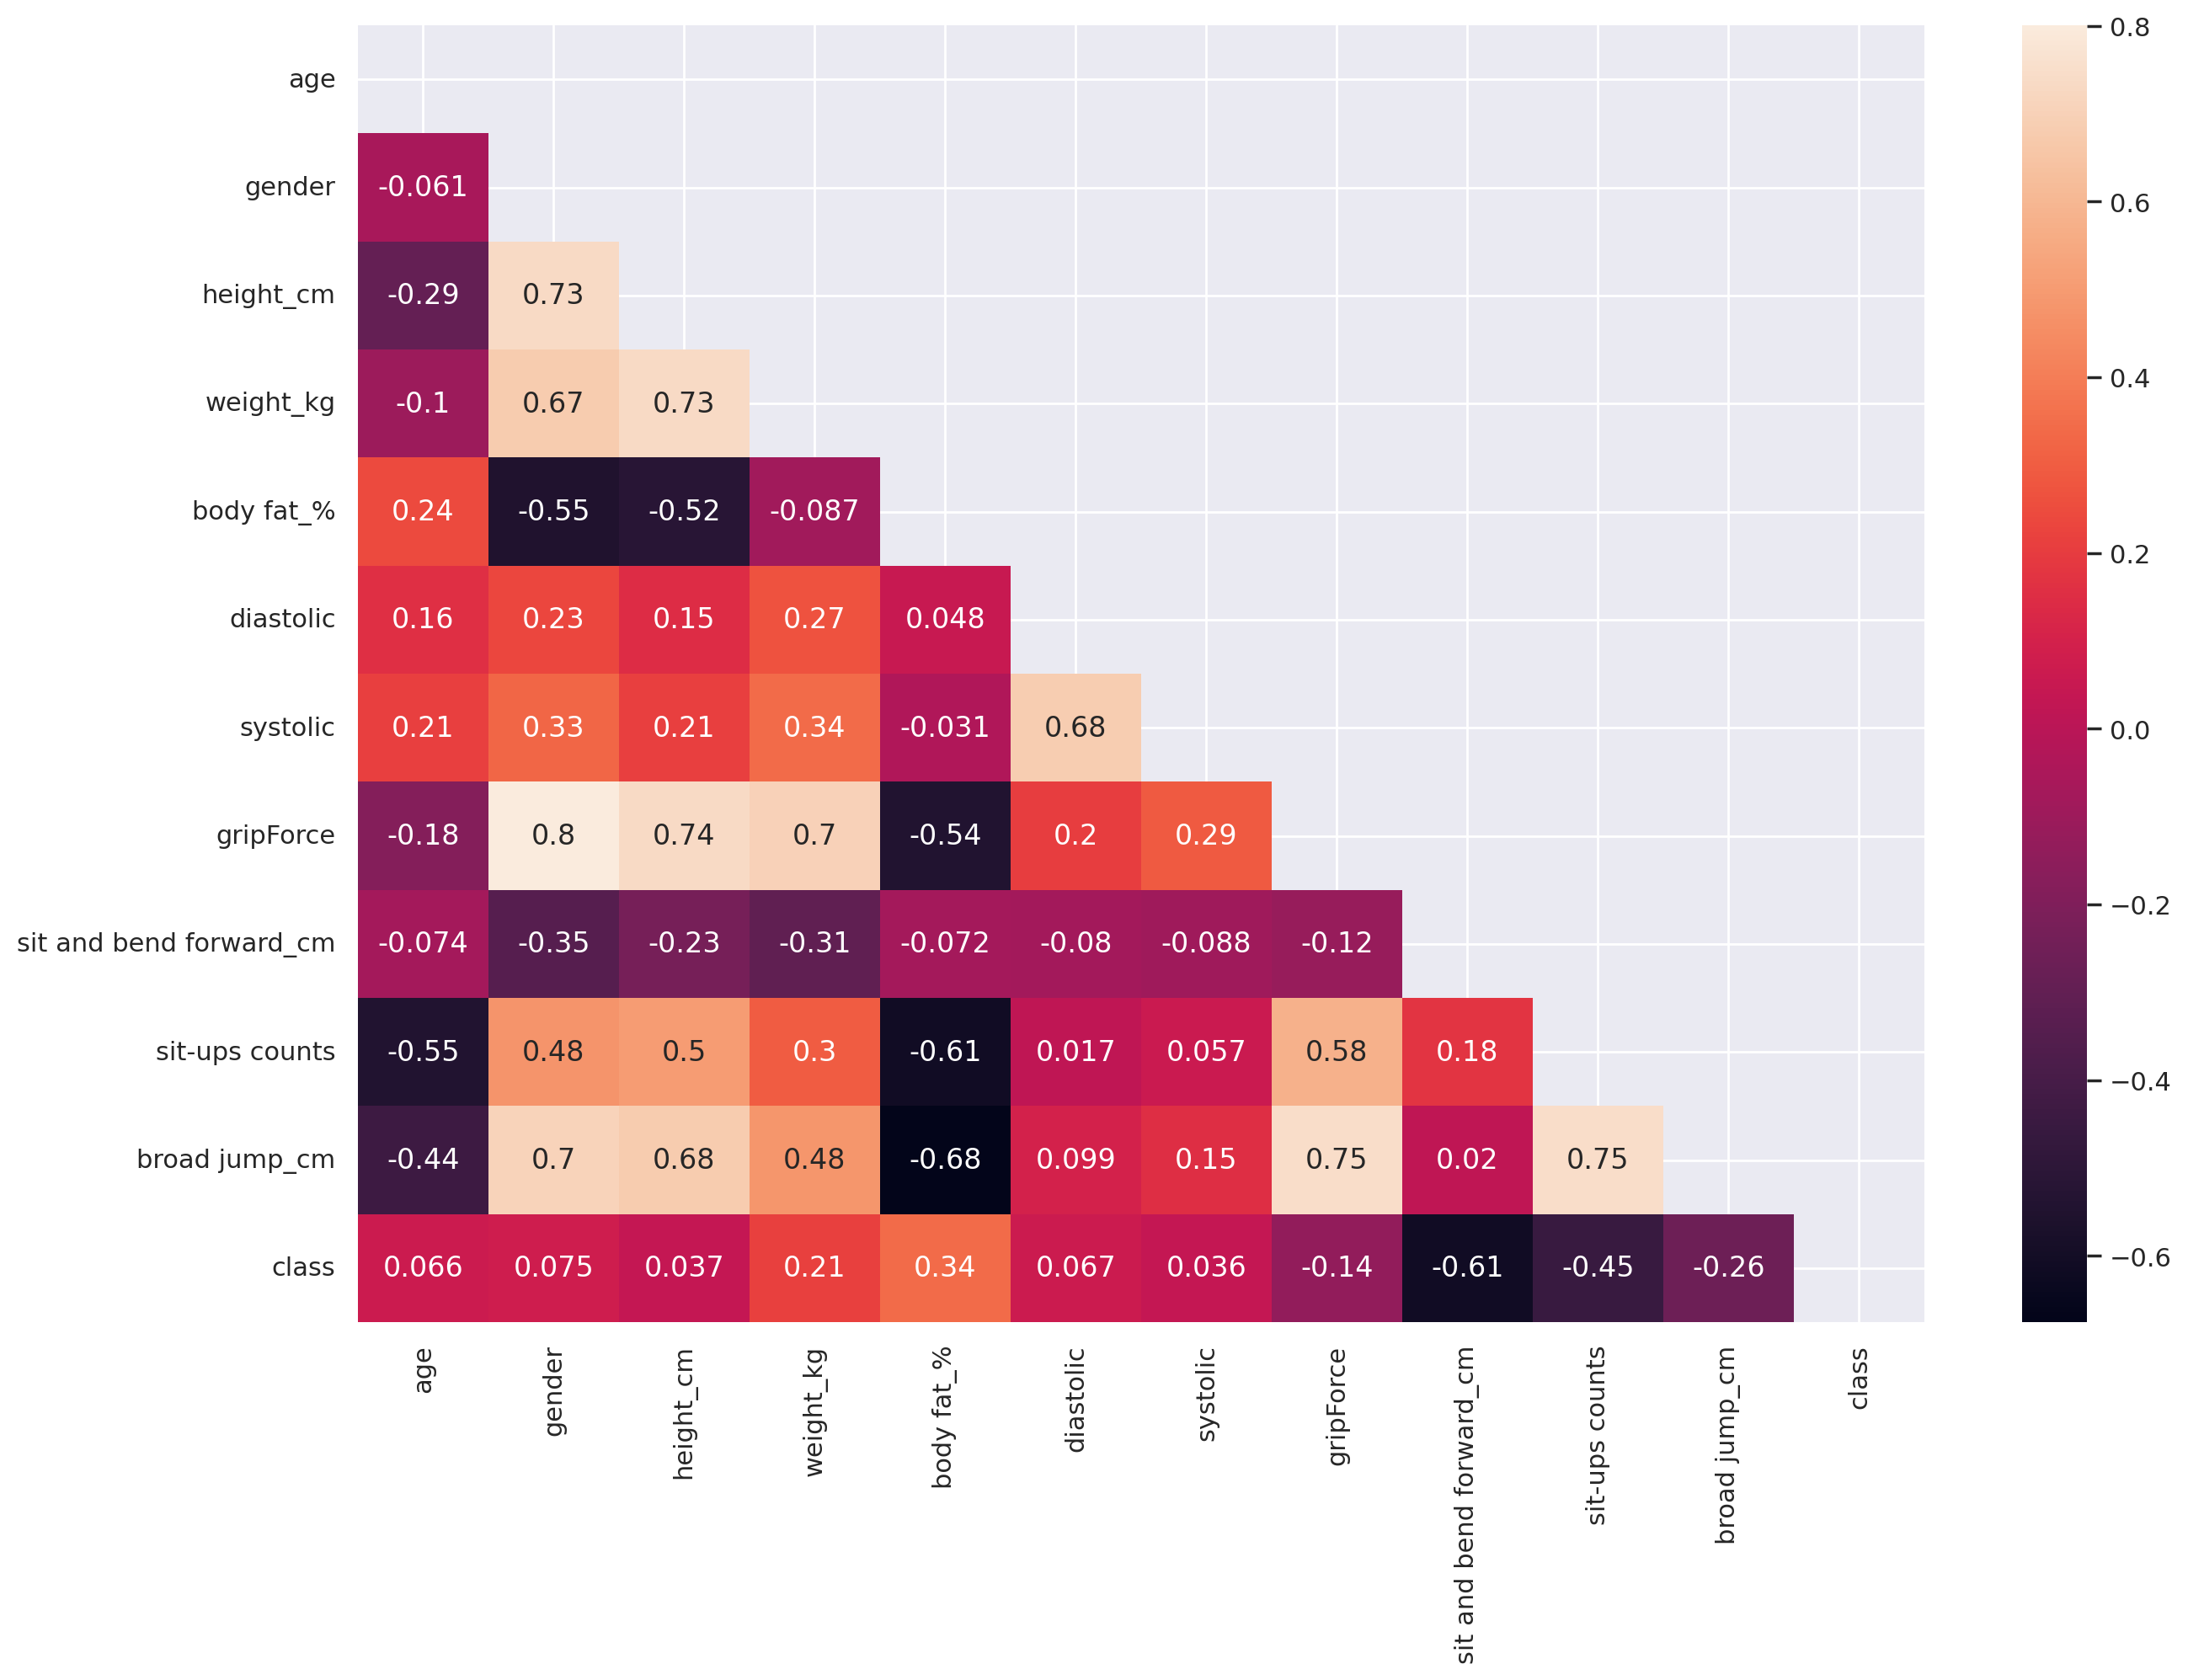

In [ ]:
plt.figure(figsize=(15,10))
triangle = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=triangle)

Видно, что искомый гендер сильно прямо коррелирует с board jump_cm, gripForce,weight_kg, height_cm

Для этого определите две метрики качества, на которые вы будете смотреть. Аргументируйте свой выбор.

После чего преобразуйте категориальные переменные и постройте модель бинарной классификации на основе линейного классификатора и сравните с KNN.

P.S.: не забудте про нормализацию.

Так как у нас относительно сбалансированные классы то будем использовать Accuracy - меру того, как часто модель правильно предсказывает метку класса. Она определяется как отношение числа правильных предсказаний к общему числу предсказаний.  
Accuracy = TP + TN/ (TP + TN + FP + FN)

Recall -долю объектов положительного класса которые модель предсказала правильно. Она вычисляется как отношение числа истинно положительных предсказаний к общему числу истинно положительных и ложно отрицательных предсказаний.Recall = TP / (TP + FN)

Accuracy и Recall должны стремиться к 1.

In [ ]:
def gender (df,method):
  '''
  Нормализация + Линейная классификация
  '''
  X = df.drop(columns=["gender"],axis=1)
  y = df["gender"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
  scaler = StandardScaler() # Помните, что на тесте делаем только transform
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = method
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print("Accuracy", accuracy)
  print('Recall',recall)

In [ ]:
gender(df,LogisticRegression())

Accuracy 0.9891507669285448
Recall 0.9918272037361354


In [ ]:
gender(df,KNeighborsClassifier(n_neighbors=10))

Accuracy 0.9891507669285448
Recall 0.9912434325744308


Оба результата очень хорошие KKN считает незначительно хуже, возожно такие результаты связаны с тем что использоваля ordinary encode(логически обоснованный) на этапе EDA.

### Задание 2: Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации (аргументируйте выбор).

Постройте модель мультиклассовой классификации на основе линейного классификатора и сравните с KNN.

LogisticRegression(multi_class='ovr'): это модель логистической регрессии с параметром multi_class, установленным в значение ovr (one-vs-rest). Это означает, что для каждого класса обучается отдельная модель логистической регрессии, которая предсказывает вероятность отнесения примера к этому классу или к остальным классам. В конечном итоге, классификация осуществляется путем выбора класса с наивысшей вероятностью.
LogisticRegression является бинарным классификатором, но благодаря обертке OneVsRestClassifier он может быть применен к мультиклассовой задаче.
Метод One-vs-All обучет K отдельных бинарных классификаторов, где K - количество классов. Каждый из этих классификаторов обучается распознавать один из классов, в то время как остальные классы объединяются в один отрицательный класс. Таким образом, каждый бинарный классификатор находится в "конфигурации один против всех остальных".
В конечном итоге, он комбинирует прогнозы всех моделей, чтобы получить финальный результат классификации.

Посмотрим разницу в обоих способах.
Будем использовать precision - какая доля объектов, которые были классифицированы как положительные, действительно являются положительными. Для мультиклассовой классификации это может быть среднее значение точности предсказания по всем классам или взвешенное среднее значение точности предсказания.
Так же посмотрим F1-мера (F1-score точность и полнота): -она показывает, какая доля объектов положительного класса была правильно классифицирована с учетом того, сколько объектов ложно классифицировано как положительные. Для мультиклассовой классификации это может быть среднее значение F1-меры по всем классам или взвешенное среднее значение F1-меры.



In [ ]:
def class_b (df,method):
  '''
  Нормализация + классификация
  '''
  X = df.drop(columns=["class"],axis=1)
  y = df["class"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
  scaler = StandardScaler() # Помните, что на тесте делаем только transform
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = method
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  precision = precision_score(y_test, y_pred, average='micro')
  precision1 = precision_score(y_test, y_pred, average='macro')
  precision2 = precision_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average = 'micro')
  f11 = f1_score(y_test, y_pred, average = 'macro')
  f12 = f1_score(y_test, y_pred, average = 'weighted')
  print("MICRO Precision", precision)
  print("MACRO Precision", precision1)
  print('weighted F1',precision2)
  print('MICRO F1',f1)
  print('MACRO F1',f11)
  print('weighted F1',f12)

In [ ]:
class_b(df,LogisticRegression(multi_class='ovr'))

MICRO Precision 0.5959595959595959
MACRO Precision 0.5704543964138538
weighted F1 0.5725122098651033
MICRO F1 0.5959595959595959
MACRO F1 0.5736527153316109
weighted F1 0.5767533882864138


In [ ]:
class_b(df,OneVsRestClassifier(LogisticRegression()))

MICRO Precision 0.5959595959595959
MACRO Precision 0.5704543964138538
weighted F1 0.5725122098651033
MICRO F1 0.5959595959595959
MACRO F1 0.5736527153316109
weighted F1 0.5767533882864138


In [ ]:
class_b(df, KNeighborsClassifier(n_neighbors=10))

MICRO Precision 0.6094276094276094
MACRO Precision 0.6308483851027744
weighted F1 0.6345748153885774
MICRO F1 0.6094276094276094
MACRO F1 0.6084045507064675
weighted F1 0.6105940278206363


Оба способа реализации мультиклассовой классификации дают один результат
KKN справляется лучше.
Самые хорошие метрики это micro (общее количество истинных положительных, ложных положительных и ложных отрицательных значений для всех классов,используемых их для вычисления метрики).